# Homework 1: Autoregressive models

## Task 1: Theory (5pt)

### Problem 1: f-divergence (1.5pt)

In the Lecture 1 we have discussed that it is possible to formulate the generative modelling task as the divergence minimization task.


$$
	\min_{\boldsymbol{\theta}} D(\pi || p),
$$

Let consider the family of f-divergencies:
$$
	D_f(\pi || p) = \mathbb{E}_{p(\mathbf{x})}  f\left( \frac{\pi(\mathbf{x})}{p(\mathbf{x})} \right)  = \int p(\mathbf{x}) f\left( \frac{\pi(\mathbf{x})}{p(\mathbf{x})} \right) d \mathbf{x},
$$
where $f: \mathbb{R}_+ \rightarrow \mathbb{R}$ is a convex, lower semicontinuous function satisfying $f(1) = 0$.

It is easy to show that any function $D_f$ satisties the divergence definition.

Your task here is to show that forward and reverse KL lie in the class of f-divergence. 
Find the functions $f$ that correspond to forward and KL divergences (they should satisfy the conditions on function $f$ described above).

Forward KL:
$$
D(\pi || p) = \int \pi(x) \log \frac{\pi(x)}{p(x)}dx
$$
Let's consider $\hat{f}(x) = x \ln x$:
$$D_{\hat{f}}(\pi || p) = \int p(x) \hat{f}\left( \frac{\pi(x)}{p(x)}\right) dx = \int \pi(x) \log \frac{\pi(x)}{p(x)} = D(\pi || p)$$
Moreover, $\hat{f}(0) = 1$ and $\hat{f}$ is convex ($\hat{f}''(x) = \frac{1}{x} \geq 0, \forall x \in \mathbb{R}^+$).
<br>
Reverse KL:
$$
D(p || \pi) = \int p(x) \log \frac{p(x)}{\pi(x)}dx
$$
Let's consider $\tilde{f}(x) = -\ln (x)$:
$$D_{\hat{f}}(\pi || p) = \int p(x) \hat{f}\left( \frac{\pi(x)}{p(x)}\right) dx = \int -p(x) \log \frac{\pi(x)}{p(x)} = \int p(x) \log \frac{p(x)}{\pi(x)} = D(p || \pi)$$
Moreover, $\tilde{f}(0) = 1$ and $\tilde{f}$ is convex ($\tilde{f}''(x) = \frac{1}{x^2} \geq 0$).

### Problem 2: Curse of dimensionality (1.5pt)

The main problem of the generative modelling is the curse of dimensionality. Let try to get some intuition about it.

Let consider a sphere of radius $r = 1$ in $\mathbb{R}^m$. Let say that it has the volume $V_m(r)$. Our goal is to find the fraction of the volume of the sphere that lies between radius $r = 1 - \epsilon$ and $r = 1$. Our geometric intuition is that this fraction is small. But the magic happens with $m$ goes to infinity. Basically, the volume of a high dimensional sphere is mostly in this small fraction!

1. Find the expression of the volume of a shpere of radius $r$ in $m$ dimensions.

2. Find the required fraction $\Delta = \frac{V_m(1) - V_m(1 - \epsilon)}{V_m(1)}$.

3. Prove that, for large $m$, the fraction tends to 1 even for small values of $\epsilon$.

**1)** <br>
Let $V(n)$ denote the volume of a sphere of radius $r=1$ in $\mathbb{R}^m$.
$$ V(n) \underset{x_1^2 + x_2^2 + \ldots + x^2_n \leq 1}{\int \ldots \int} dx_1 dx_2 \ldots dx_n = \underset{x_1^2 + x_2^2 \leq 1}{\int \int} \left( \underset{x_3^2 + \ldots + x^2_n \leq 1 - x^2_1 - x_2^2}{\int \ldots \int} dx_3 \ldots dx_n  \right) dx_1 dx_2$$

$\left( \underset{x_3^2 + \ldots + x^2_n \leq 1 - x^2_1 - x_2^2}{\int \ldots \int} dx_3 \ldots dx_n  \right)$ is a volume of a $n-2$ dimensional sphere of a radius $\sqrt{1 - x^2_1 - x_2^2}$. From dimensional considerations (соображения размерности): 
$$ \left( \underset{x_3^2 + \ldots + x^2_n \leq 1 - x^2_1 - x_2^2}{\int \ldots \int} dx_3 \ldots dx_n  \right) = (1 - x_1^2 - x_2^2)^{\frac{n-2}{2}} V(n-2) $$
Thus,
$$ V(n) = V(n - 2) \underset{x_1^2 + x_2^2 \leq 1}{\int \int} (1 - x_1^2 - x_2^2)^{\frac{n-2}{2}} dx_1 dx_2 \overset{\text{polar coordinates}}{=} V(n - 2) \int_0^{2\pi} \int_0^1 (1 - r^2)^{\frac{n-2}{2}} rdr d\theta = \frac{2\pi}{n}V(n-2)$$

Some magic here and there, and we get $V(n) = \frac{\pi^{n/2}}{\Gamma(\frac{n}{2} + 1)}$<br>
**2)** <br>
I don't why I even computed the $V(n)$. We can use the same dimensionality logic to get $V_m(1 - \varepsilon) = (1 - \varepsilon)^m V_m(1)$.

$$\Delta = \frac{V_m(1) - V_m(1 - \epsilon)}{V_m(1)} = 1 - (1 - \varepsilon)^m$$
**3)** <br>


$\underset{m \rightarrow \infty}{\lim} (1 - (1 - \varepsilon)^m) = 1$, since $\underset{m \rightarrow \infty}{\lim} (1 - \varepsilon)^m = 0$

### Problem 3: Expressivity of normalizing flows (2pt)

This problem considers the following question. Are normalizing flows able to represent **any** distribution $\pi(\mathbf{x})$, even if the base distribution $p(\mathbf{u})$ is restricted to be simple?

Let $\pi(\mathbf{x})$ is an absolutely continuous probability distribution supported everywhere on $\mathbb{R}^m$ (i.e. $\pi(\mathbf{x}) > 0$ for all $\mathbf{x} \in \mathbb{R}^m$). Additionally we suppose, that the pdf $\pi(\mathbf{x})$ is continuously differentiable on  $\mathbb{R}^m$.  Our ultimate goal is to show, that there exists diffeomorphism (invertible continuously differentiable map):
$$
    \mathbf{u} = F(\mathbf{x}) \quad F : \mathbb{R}^m \rightarrow \mathbb{U}.
$$
Here $\mathbb{U} = [0, 1]^m$ is a hypercube and $F$ turns $\pi(\mathbf{x})$ into uniform distribution $p(\mathbf{u}) = U[0, 1]^m$ on the hypercube $\mathbb{U}$ ($p(\mathbf{u}) = 1 \,,\, \mathbf{u} \in \mathbb{U}$). Here we have to think about openness and closeness of $\mathbb{U}$ for formal math correctness, but we omit it in this task. 

<details> 
  <summary> <i>Math correctness comment</i> </summary>
  
   Strictly speaking, the diffeomorphism $F$ maps $\mathbb{R}^m$ to the open cube $\text{int}\left(\mathbb{U}\right) = (0, 1)^m$, sinse the reverse mapping $F^{-1} : \text{int}\left(\mathbb{U}\right) \rightarrow \mathbb{R}^m$ is continuous $\Rightarrow$ the preimage of the open set $\mathbb{R}^m$ with respect to $F^{-1}$ should be <b>open</b>: $(F^{-1})^{-1}(\mathbb{R}^m) = F(\mathbb{R}^m) = \text{an open set}$
   
</details>

So, if such function exists, it means that **there exists normalizing flow model from base uniform distribution to any(!) target distribution.**

---------

1. Consider the autoregressive decomposition of $\pi(\mathbf{x})$:

$$
    \pi(\mathbf{x}) = \prod\limits_{j = 1}^{m} \pi(x_j|\mathbf{x}_{1:j - 1}).
$$

2. Treat each component $\pi(x_j|\mathbf{x}_{1:j - 1})$ in the decomposition above separately. Consider the transformations:

$$
    \mathbf{x} \rightarrow u_j = F_j(x_j, \mathbf{x}_{1:j - 1}) = \int\limits_{- \infty}^{x_j} \pi(x_j'|\mathbf{x}_{1:j - 1}) d x_j'.
$$

   Here $F_j(x_j, \mathbf{x}_{1:j - 1})$ is the cumulative distribution function of $j$-th conditional $x_j$ (given $\mathbf{x}_{1:j - 1}$) Note, that $u_j \in [0, 1]$.

3. Define the transform $F : \mathbb{R}^m \rightarrow \mathbb{U}$ as follows:
    
$$
    \mathbf{x} \rightarrow \mathbf{u} = \begin{bmatrix} F_1(x_1) \\ F_2(x_2,x_1) \\ \dots \\ F_m(x_m, \mathbf{x}_{1:m-1})\end{bmatrix}.
$$
    
Given the properties of $\pi$ ($\pi(\mathbf{x}) > 0$ and continuously differentiable) it is easy to show, that $F$ is continuously differentiable. We omit the details since they are just boring mathematical calculations.

1) Prove, that $\det \mathbf{J}_F (\mathbf{x}) = \pi(x)$ (it follows, that the function $F : \mathbb{R}^m \rightarrow \mathbb{U}$ is invertible).

2) Prove, that $\mathbf{u}$ is a uniformly distributed ($p(\mathbf{u}) = U[0,1]^m)$.

3) Let $\pi(\mathbf{x})$ and $\mu(\mathbf{y})$ are absolutely continuous probability distributions supported everywhere on $\mathbb{R}^m$, whose pdfs are continuously differentiable. Prove that there exists a diffeomorphism $G : \mathbb{R}^m \rightarrow \mathbb{R}^m$ which turns $\pi$ into $\mu$, i.e.:

$$\mathbf{y} = G(\mathbf{x}), \quad \text{where } \mathbf{x} \sim \pi(\mathbf{x}), \, \mathbf{y} \sim \mu(\mathbf{y}).$$

**1)** <br>
$$ J_F(x)_{ij} = \left( \frac{\partial F_i}{\partial x_j}\right) $$
We can see that $\left( \frac{\partial F_i}{\partial x_j}\right) = 0$ if $i > j$ since in that case $F_i$ does not depend on $x_j$. It means that $J_F$ is a upper triangular matrix and
$$\det J_F(x) = \prod_{j = 1}^m \frac{\partial F_j}{\partial x_j} $$
$$\frac{\partial F_j}{\partial x_j} = \frac{\partial}{\partial x_j} \int\limits_{- \infty}^{x_j} \pi(x_j'|\mathbf{x}_{1:j - 1}) d x_j' = \pi(x_j|\mathbf{x}_{1:j - 1}) $$
$$\det J_F(x) = \prod_{j = 1}^m \pi(x_j|\mathbf{x}_{1:j - 1}) = \pi(x)$$
<br> **2)** <br>
$$p(u) = p(x) \det(J_F(x))^{-1} = \frac{\pi(x)}{\pi(x)} = 1$$
Each $u_i$ is defined as a cumulative distribution function $\Rightarrow$ $0 \leq u_i \leq 1$. <br>
So we get that $p(u) = U[0, 1]^m$ <br>
<br> **3)** <br>
We just proved that
$$\exists F^x, F^y: x \overset{F^x}{\rightarrow} u, \; y \overset{F^y}{\rightarrow} u, \; p(u) = U[0, 1]^m$$
and both $F^x, F^y$ are diffeomorphisms. Now if we will consider $G = (F^y)^{-1} \circ F^x$ we will get our desired diffeomorphism.

Now it time to move on to practical part of homework.

In our course we will use a small util [package](https://github.com/r-isachenko/dgm_utils) with some usefull functions for loading and visualizing the images and training curves. In each homework there will be a cell with installing this package. Please read carefully the sources of the functions from this package. It could help you to solve the tasks.

In [1]:
COMMIT_HASH = "79dfd7865ba692235f0a4d5aed20ee2820a19007"
!if [ -d dgm_utils ]; then rm -Rf dgm_utils; fi
!git clone https://github.com/r-isachenko/dgm_utils.git
%cd dgm_utils
!git checkout {COMMIT_HASH}
!pip install ./
%cd ./..
!rm -Rf dgm_utils

/usr/bin/bash: /opt/miniconda3/lib/libtinfo.so.6: no version information available (required by /usr/bin/bash)
/usr/bin/bash: /opt/miniconda3/lib/libtinfo.so.6: no version information available (required by /usr/bin/bash)
Cloning into 'dgm_utils'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (188/188), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 188 (delta 122), reused 83 (delta 43), pack-reused 0 (from 0)
Receiving objects: 100% (188/188), 41.78 KiB | 122.00 KiB/s, done.
Resolving deltas: 100% (122/122), done.
/home/nuzhnovma/2025-DGM-MIPT-YSDA-course/homeworks/dgm_utils
/usr/bin/bash: /opt/miniconda3/lib/libtinfo.so.6: no version information available (required by /usr/bin/bash)
Note: switching to '79dfd7865ba692235f0a4d5aed20ee2820a19007'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by swit

In [1]:
from dgm_utils import train_model
from dgm_utils import show_samples, visualize_images, load_dataset
from dgm_utils import BaseModel

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from typing import Optional, Literal

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

if torch.cuda.is_available():
    DEVICE = torch.device("cuda:5")
    print('GPU found :)')
else:
    DEVICE = "cpu"
    print('GPU not found :(')

GPU found :)


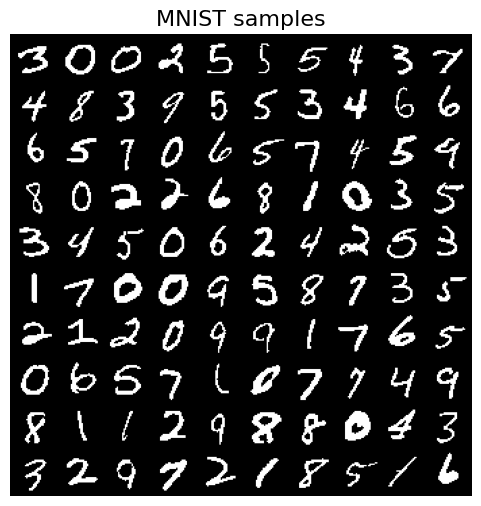

In [3]:
train_data, test_data = load_dataset("mnist", flatten=False, binarize=True)
visualize_images(train_data.astype(float), "MNIST samples")

## Task 2: PixelCNN receptive field and autocompletion on MNIST (5pt)

In this task, you will **analyze PixelCNN**, focusing on its sampling capabilities and receptive field. See the [lecture 1](https://github.com/r-isachenko/2025-DGM-MIPT-YSDA-course/blob/main/lectures/lecture1/Lecture1.pdf), [seminar 1](https://github.com/r-isachenko/2025-DGM-MIPT-YSDA-course/blob/main/seminars/seminar1/seminar1_Part2_PixelCNN.ipynb) and [paper](https://arxiv.org/abs/1601.06759) for details.

### Architecture

Masked Convolution Layer is the basic building block of PixelCNN model. Look carefully at this code.

In [4]:
class MaskedConv2d(nn.Conv2d):
    def __init__(
        self, mask_type: Literal['A', 'B'], in_channels: int, out_channels: int, kernel_size: int = 5
    ) -> None:
        assert mask_type in ["A", "B"]
        super().__init__(
            in_channels=in_channels,
            out_channels=out_channels,
            kernel_size=kernel_size,
            padding=kernel_size // 2,
        )
        # register_buffer() registers the tensor as a non-trainable buffer:
        # 1. It stays on the same device as the model (moves with .to(device)).
        # 2. It is not updated during backpropagation (not a learnable parameter).
        self.register_buffer("mask", torch.zeros_like(self.weight))
        self.create_mask(mask_type)

    def forward(self, input: torch.Tensor) -> torch.Tensor:
        return F.conv2d(input, self.weight * self.mask, self.bias, padding=self.padding)

    def create_mask(self, mask_type: Literal['A', 'B']) -> None:
        # NOTE: try to understand the logic about mask_type
        k = self.kernel_size[0]
        self.mask[:, :, : k // 2] = 1
        self.mask[:, :, k // 2, : k // 2] = 1
        if mask_type == "B":
            self.mask[:, :, k // 2, k // 2] = 1

[Layer Normalization](https://arxiv.org/abs/1607.06450) stabilizes training. We normalize only over the channel dimension because `nn.LayerNorm([C, H, W])` would normalize each pixel position independently, disrupting the feature map structure essential for PixelCNN.

In [5]:
class LayerNorm(nn.LayerNorm):
    def __init__(self, n_filters: int) -> None:
        super().__init__(n_filters)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = x.permute(0, 2, 3, 1).contiguous()
        x = super().forward(x)
        return x.permute(0, 3, 1, 2).contiguous()

Now we are ready to define the main PixelCNN model.

In [7]:
class PixelCNN(BaseModel):
    def __init__(
        self,
        input_shape: tuple[int, int],
        n_filters: int = 64,
        kernel_size: int = 7,
        n_layers: int = 5,
        use_layer_norm: bool = True,
    ) -> None:

        super().__init__()
        self.input_shape = input_shape

        # we apply the sequence of MaskedConv2d -> LayerNorm (it is optional) -> ReLU
        # the last layer should be MaskedConv2d (not ReLU)
        # Note 1: the first conv layer should be of type 'A'
        # Note 2: final output_dim in MaskedConv2d must be 2
        model: list[nn.Module] = [MaskedConv2d("A", 1, n_filters, kernel_size=kernel_size)]

        for _ in range(n_layers):
            if use_layer_norm:
                model.append(LayerNorm(n_filters))
            model.append(nn.ReLU())
            model.append(MaskedConv2d("B", n_filters, n_filters, kernel_size=kernel_size))

        model.append(nn.ReLU())
        model.append(MaskedConv2d("B", in_channels=n_filters, out_channels=2, kernel_size=1))
        self.net = nn.Sequential(*model)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        batch_size = x.shape[0]
        out = (x.float() - 0.5) / 0.5
        out = self.net(out)
        return out.view(batch_size, 2, 1, *self.input_shape)

    def loss(self, x: torch.Tensor) -> dict:
        # our loss is just cross entropy
        total_loss = F.cross_entropy(self(x), x.long())
        return {"total_loss": total_loss}

    @torch.no_grad()
    def sample(self, n: int) -> np.ndarray:
        # read carefully the sampling process
        # here you see the sequential process of sampling
        samples = torch.zeros(n, 1, *self.input_shape).to(self.device)
        for r in range(self.input_shape[0]):
            for c in range(self.input_shape[1]):
                logits = self(samples)[:, :, :, r, c]
                probs = F.softmax(logits, dim=1).squeeze(-1)
                samples[:, 0, r, c] = torch.multinomial(probs, num_samples=1).squeeze(-1)
        return samples.cpu().numpy()

### Training

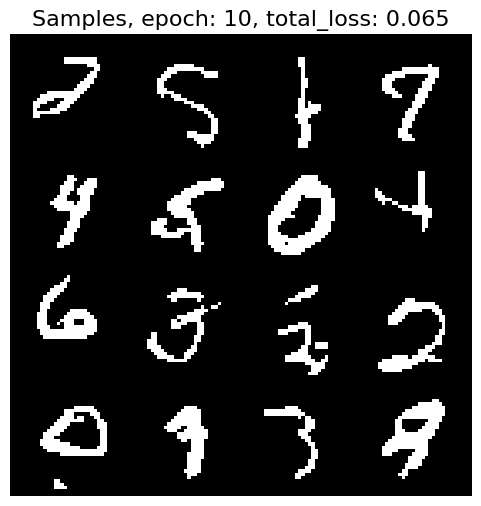

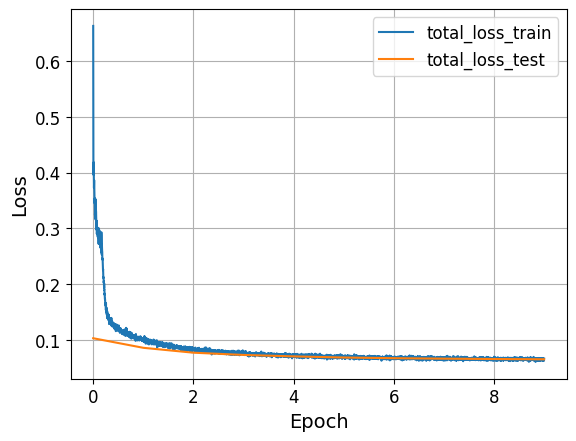

End of the training


In [8]:
# ====
# your code
# choose these parameters
EPOCHS = 10
BATCH_SIZE  = 128
LR = 0.001
N_LAYERS = 5
N_FILTERS = 64
USE_LAYER_NORM = True
# ====

pixel_cnn = PixelCNN(
    input_shape=(32, 32),
    n_filters=N_FILTERS,
    kernel_size=7,
    n_layers=N_LAYERS,
    use_layer_norm=USE_LAYER_NORM,
)

train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(test_data, batch_size=BATCH_SIZE)

# choose any optimizer/scheduler as you want
optimizer = torch.optim.Adam(pixel_cnn.parameters(), lr=LR)

train_model(
    pixel_cnn,
    train_loader,
    test_loader,
    epochs=EPOCHS,
    optimizer=optimizer,
    device=DEVICE,
    n_samples=16, # Remember the infernce is slow, so, you can lower the value
    visualize_samples=True # or you can turn off smapling by setting `visualize_samples=False`
)

Now we sample the new images from the model. Notice that the model is sequential and **sampling is really slow** (it is a drawback of all AR models)

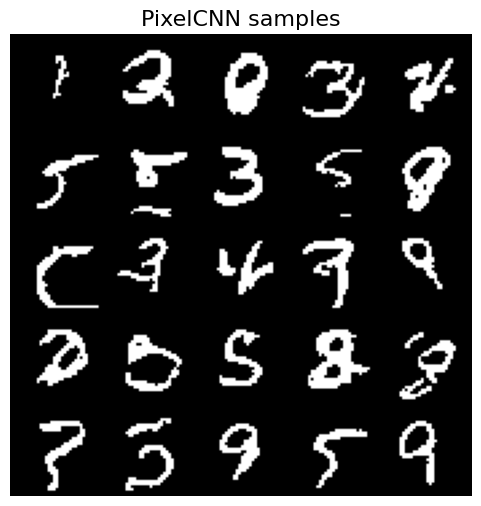

In [9]:
samples = pixel_cnn.sample(25)
show_samples(samples, title="PixelCNN samples", nrow=5)

### Image autocompletion

One more feature of autoregressive models is that they can be **easily adapted for image autocompletion**. As autoregressive models predict pixels one by one, we can set the first pixels to predefined values and check how the model completes the image.

For implementing this, we just need to skip the iterations in the sampling loop that already have a value unequals to -1.
We redefine the sample method in our PixelCNN class to allow it to take the init of the sample.

In [ ]:
class PixelCNNAutoComplete(PixelCNN):
    @torch.no_grad()
    def sample(self, n: int, init: Optional[torch.Tensor] = None) -> np.ndarray:
        # ====
        # your code
        # this method almost the same as the method of the base PixelCNN model
        # but now if init is given, this tensor will be used as a starting image.
        # NOTE: fill the pixels only with value equals to -1 in the input tensor.
        samples = init if init is not None else torch.zeros(n, 1, *self.input_shape).to(self.device)
        for r in range(self.input_shape[0]):
            for c in range(self.input_shape[1]):
                fill_mask = samples[:, 0, r, c] == -1
                logits = self(samples)[:, :, :, r, c]
                probs = F.softmax(logits, dim=1).squeeze(-1)
                sampled_values = torch.multinomial(probs, num_samples=1).squeeze(-1)
                samples[:, 0, r, c] = torch.where(fill_mask, sampled_values, samples[:, 0, r, c])
        return samples.cpu().numpy()

To skip training the model again, we simply load the parameters from an already trained one.

In [31]:
pixel_cnn_ac = PixelCNNAutoComplete(
    input_shape=(32, 32),
    n_filters=N_FILTERS,
    kernel_size=7,
    n_layers=N_LAYERS,
    use_layer_norm=USE_LAYER_NORM,
)

pixel_cnn_ac.load_state_dict(pixel_cnn.state_dict())

<All keys matched successfully>

We randomly take images from the training set, mask the lower half of the image (set -1's), and let the model autocomplete it. We do this several times for each image to see the diversity of samples.

torch.Size([4, 1, 32, 32]) (32, 32)


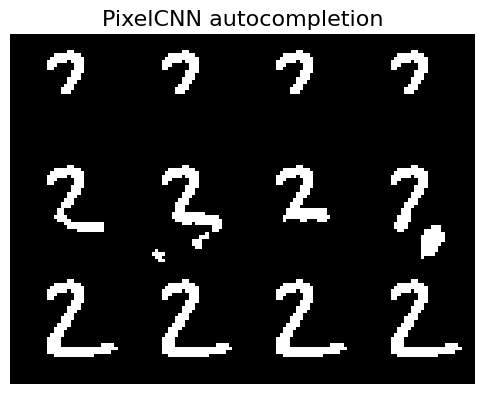

torch.Size([4, 1, 32, 32]) (32, 32)


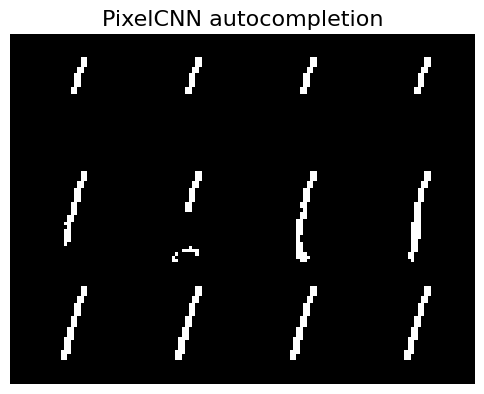

torch.Size([4, 1, 32, 32]) (32, 32)


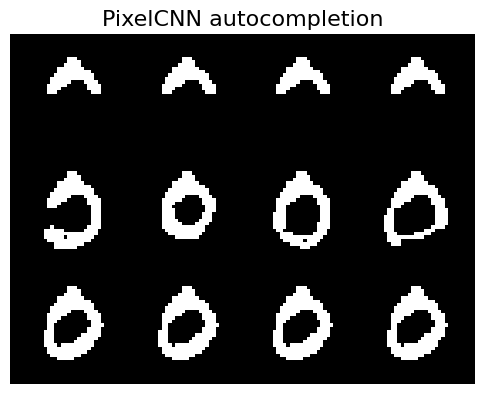

In [ ]:
def autocomplete_image(
    original_image: np.ndarray,
    model: PixelCNNAutoComplete,
    n_samples: int
) -> None:
    # Remove lower half of the image
    original_image = np.repeat(original_image[None, :, :, :], n_samples, axis=0)
    masked_image = original_image.copy()
    masked_image[:, :, masked_image.shape[2] // 2 :, :] = -1

    # Generate completions
    generated_image = model.sample(n_samples, torch.tensor(masked_image).to(model.device))
    images_to_show = np.concat([np.maximum(masked_image, 0), generated_image, original_image], axis=0)
    show_samples(images_to_show.astype(float), title="PixelCNN autocompletion", nrow=n_samples)

for i in range(1, 4):
    autocomplete_image(test_data[i], pixel_cnn_ac, n_samples=4)

### Receptive field

Next, let's visualize the model's receptive field. It **can be empirically measured** by backpropagating an arbitrary loss from a specific output pixel back to the input.

In [55]:
def plot_receptive_field(model: nn.Module, model_name: str) -> None:
    # ====
    # your code
    # 1) create tensor with zeros and set required_grad to True.
    # 2) apply model to the tensor
    # 3) apply backward() to the center pixel of model output
    # 4) take the gradient with respect to input
    # 5) binary receptive field is an indicator map in which we stay 1's if absolute gradient more than 1e-8
    # 6) weighted receptive field is the normalized absolute gradient (values lies in [0, 1])

    input_tensor = torch.zeros(1, 1, 32, 32, requires_grad=True, device=DEVICE)
    x_center = 16
    y_center = 16
    output_tensor = model(input_tensor)

    output_tensor[..., x_center, y_center].sum().backward()
    grad = input_tensor.grad.abs().cpu().numpy().squeeze()
    binary_map = (grad > 1e-8).astype(float)
    weighted_map = grad / grad.max()

    # ====

    # we stack the maps to get RGB image
    binary_map = np.stack([binary_map, binary_map, binary_map], axis=-1)
    weighted_map = np.stack([weighted_map, weighted_map, weighted_map], axis=-1)

    # center point will be red
    binary_map[x_center, y_center] = [1, 0, 0]
    weighted_map[x_center, y_center] = [1, 0, 0]

    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    ax[0].imshow(weighted_map, vmin=0.0, vmax=1.0)
    ax[1].imshow(binary_map, vmin=0.0, vmax=1.0)

    ax[0].set_title(f"Weighted receptive field for {model_name}")
    ax[1].set_title(f"Binary receptive field for {model_name}")

    ax[0].axis("off")
    ax[1].axis("off")
    plt.show()

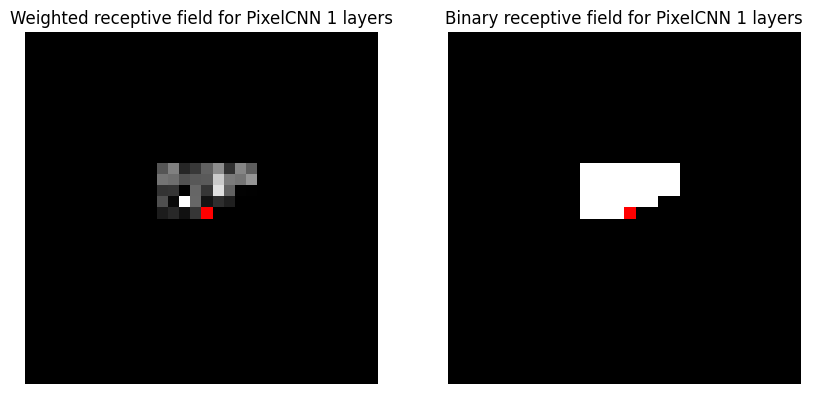

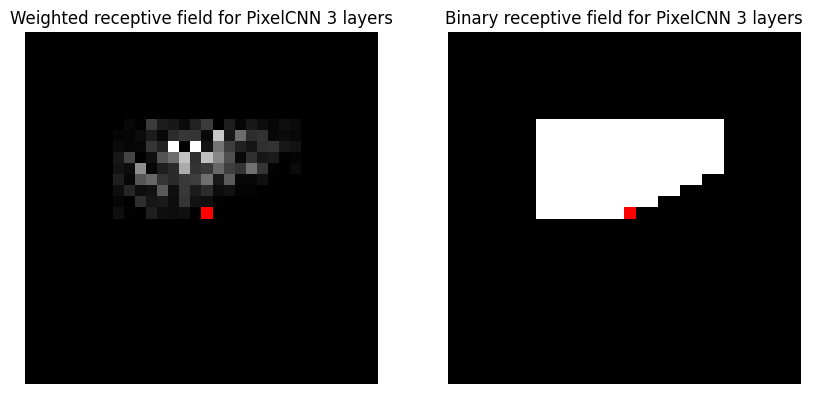

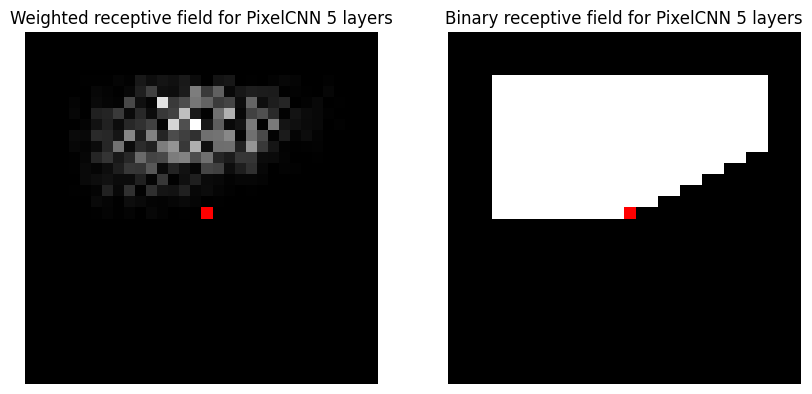

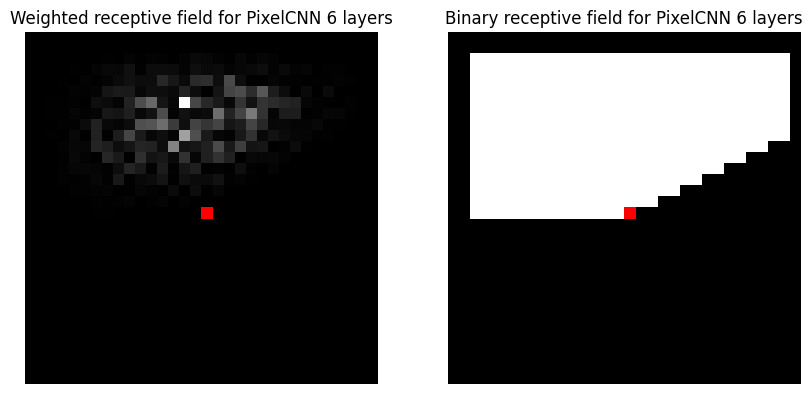

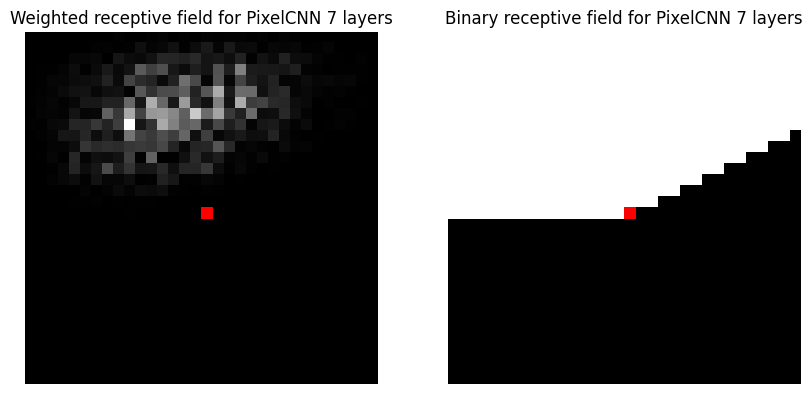

In [56]:
for n_layers in [1, 3, 5, 6, 7]:
    model = PixelCNN(
        input_shape=(32, 32),
        n_filters=32,
        kernel_size=5,
        n_layers=n_layers,
        use_layer_norm=True
    )
    model = model.to(DEVICE)
    plot_receptive_field(model, model_name=f"PixelCNN {n_layers} layers")

You can see that as the number of convolutional layers increases, the **receptive field expands**. However, it **remains relatively limited**. Even with a well-trained model, generated samples **lack long-range dependencies**. Moreover, you may notice a strange **blind spot** in the binary receptive field plot on the right side. This is a known issue with the PixelCNN model. Please try to understand why it happens.

One way to solve this problem is a [GatedPixelCNN](https://arxiv.org/pdf/1606.05328.pdf) model (see paper, if you are interested in).

## Task 3: ImageGPT on MNIST (5pt)

In this task you will try to implement the Image Transformer net for an autoregressive generation MNIST images. See the [blog](https://openai.com/blog/image-gpt/) and [paper](https://cdn.openai.com/papers/Generative_Pretraining_from_Pixels_V2.pdf) for details.

### Architecture

Let start with **the multihead attention block**. Each head of the multihead attention computes an embedding
$$
    \text{Attention}(\mathbf{Q}, \mathbf{K}, \mathbf{V}) = \text{softmax}\left(\frac{\mathbf{Q}\mathbf{K}^T}{\sqrt{d_k}}\right) \mathbf{V},
$$
where $\mathbf{Q}, \mathbf{K}, \mathbf{V}$ - query/key/value matrices obtained using Linear projection of $\mathbf{h}^l$.

**To make the model autoregressive** we will introduce the following changes:

1. We will apply the upper triangular mask to the matrix of attention logits ($\mathbf{Q}\mathbf{K}^T$). Masked values are made close to minus infinity so they will turn zero after softmax.
2. During training we will add "start of sequence" token to the input tensor and pop the last pixel.

Note: we will use raster order to identify which pixels come first (as we have done in PixelCNN). For each pixel the predicted probabality is conditioned on all the previous pixels.

In [6]:
class MultiheadAttention(nn.MultiheadAttention):
    def __init__(self, embed_dim: int, num_heads: int) -> None:
        super().__init__(embed_dim, num_heads)

    def get_attention_mask(self, x: torch.Tensor) -> torch.Tensor:
        # ====
        # your code
        # define attention mask, it should contain
        # - zeros under and on the main diagonal
        # - minus Inf above the main diagonal
        seq_len, _, _ = x.shape
        attention_mask = torch.ones(seq_len, seq_len, device=x.device, dtype=x.dtype)
        attention_mask -= torch.triu(attention_mask, diagonal=0)
        attention_mask = torch.where(
            attention_mask == 1,
            torch.tensor(-torch.inf, device=x.device, dtype=x.dtype), attention_mask
        ).T
        # ====
        return attention_mask

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        attn_mask = self.get_attention_mask(x)
        return super().forward(x, x, x, attn_mask=attn_mask, need_weights=False)[0]


def test_attention_mask() -> None:
    x = torch.zeros(2, 4, 16)  # (pixel_num, batch_size, emb_dim)
    mask = np.array([[0.0, -np.inf], [0.0, 0.0]])
    layer = MultiheadAttention(16, 8)
    attention_mask = layer.get_attention_mask(x)
    assert attention_mask.size() == (x.size(0), x.size(0))
    assert np.allclose(attention_mask.numpy(), mask)
    out = layer(x)
    assert x.size() == out.size()


test_attention_mask()

Now we will define **the decoder block** wich transformes the tensor as follows:
\begin{align}
    \mathbf{n}^l &= \text{layer\_norm}_1\left(\mathbf{h}^l\right), \\
    \mathbf{a}^l &= \mathbf{h}^l + \text{multihead\_attention}\left(\mathbf{n}^l\right), \\
    \mathbf{h}^{l+1} &= \mathbf{a}^l + \text{MLP}\left(\text{layer\_norm}_2\left(a^l\right)\right). \\
\end{align}

The $l^{\text{th}}$ block receives a tensor $\mathbf{h}^l$ with shape `(pixel_num, batch_size, emb_dim)` where `pixel_num` is a total number of pixels $(28*28)$ and `emb_dim` is a hyperparameter for the size of the embeddings. We will use just 2 linear layers with ReLU activation for MLP. 

In [7]:
class TransformerBlock(nn.Module):
    def __init__(self, embed_dim: int, num_heads: int) -> None:
        super().__init__()
        assert embed_dim % num_heads == 0

        # ====
        # your code
        # define multihead attention (https://pytorch.org/docs/stable/generated/torch.nn.MultiheadAttention.html)
        # define LayerNorm (https://pytorch.org/docs/stable/generated/torch.nn.LayerNorm.html)
        # (here we do not use previous class for LayerNorm because we do not need to change order of tensor dimensions)
        # define MLP - 2 linear layers with ReLU
        # (You could choose the latent dimensionality of MLP as you like. For example, double the embed_dim)
        self.ln1 = nn.LayerNorm(embed_dim)
        self.ln2 = nn.LayerNorm(embed_dim)
        self.mha = MultiheadAttention(embed_dim, num_heads)
        self.mlp = nn.Sequential(
            nn.Linear(embed_dim, 2 * embed_dim),
            nn.ReLU(),
            nn.Linear(embed_dim * 2, embed_dim)
        )

        # ====

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # ====
        # your code
        # here you have to implement formulas that described above.
        normed_x = self.ln1(x)
        a = x + self.mha(normed_x)
        # ====
        return a + self.mlp(self.ln2(a))


def test_decoder_block() -> None:
    block = TransformerBlock(embed_dim=12, num_heads=4)
    x = torch.zeros(4, 28, 12)
    assert x.shape == block(x).shape


test_decoder_block()

Finally, let's construct the Image Transformer. It consists of $L$ sequentially applied decoder blocks.

The initial embedding $h^1$ is the sum of the token embedding of the input batch and a trainable positional embedding, with a "start of sequence" token prepended. 

After passing through the last decoder block, we apply `nn.LayerNorm` followed by a `nn.Linear` layer to produce logits of shape `(pixel_num, batch_size, 1)`:

$$
\begin{align*}
  n^L &= \text{layer\_norm}\left(h^L\right) \\
  \text{logits} &= \text{linear}\left(n^L\right)
\end{align*}
$$

In [8]:
class ImageGPT(BaseModel):
    def __init__(
        self, input_shape: tuple[int, int], embed_dim: int, num_heads: int, num_layers: int
    ) -> None:
        super().__init__()

        self.embed_dim = embed_dim
        self.input_shape = input_shape
        self.criterion = nn.BCEWithLogitsLoss()

        # "start of sequence" token (we initialize it from Normal distribution)
        self.sos = nn.Parameter(torch.zeros(embed_dim))

        # ====
        # your code
        # 1) define token_embeddings (we will have 2 embeddings in total, because our images are binary)
        # 2) define position_embeddings (we will use nn.Embedding)
        self.token_embeddings = nn.Embedding(2, embed_dim)
        self.position_embeddings = nn.Embedding(input_shape[0] * input_shape[1], embed_dim)

        # ====

        self.layers = nn.ModuleList()
        # ====
        # your code
        # 1) add decoder blocks to self.layers list
        # 2) define last LayerNorm
        # 3) define final Linear layer (without bias)
        for _ in range(num_layers):
            self.layers.append(TransformerBlock(embed_dim, num_heads))
        self.ln = nn.LayerNorm(embed_dim)
        self.linear = nn.Linear(embed_dim, 1, bias=False)
        # ====

    def add_sos_token(self, embeddings: torch.Tensor) -> torch.Tensor:
        batch_size = embeddings.size(1)
        # ====
        # your code
        # prepend sos (start of sequence) token
        # 1) repeat sos token batch_size times (make it of size (1, batch_size, emd_size))
        # 2) drop last embedding from embeddings
        # 3) concat repeated sos token to embeddings (after dropping)
        sos = self.sos.unsqueeze(0).unsqueeze(0).expand(1, batch_size, -1)

        embeddings = embeddings[:-1]
        embeddings = torch.cat([sos, embeddings], dim=0)

        # ====
        return embeddings

    def add_pos_embeddings(self, embeddings: torch.Tensor) -> torch.Tensor:
        length = embeddings.size(0)
        # ====
        # your code
        # add positional embeddings
        # 1) define tensor with positions (just torch.arange) of size (length, 1)
        # 2) add position embeddings to initial embeddings
        positions = torch.arange(length, device=embeddings.device).unsqueeze(1)
        embeddings = embeddings + self.position_embeddings(positions)

        # ====
        return embeddings

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = x.long()
        x = x.reshape(x.size(0), -1)  # (batch_size, length)
        x = x.permute(1, 0)

        embeddings = self.token_embeddings(x)  # (length, batch_size, emb_size)
        embeddings = self.add_sos_token(embeddings)
        embeddings = self.add_pos_embeddings(embeddings)

        # ====
        # your code
        # 1) apply all decoder layers
        # 2) apply final LayerNorm and Linear layer
        for layer in self.layers:
            embeddings = layer(embeddings)
        embeddings = self.ln(embeddings)
        logits = self.linear(embeddings)
        # ====

        return logits.permute(1, 0, 2)  # (length, batch_size, emb_size) -> (batch_size, length, emb_size)

    def loss(self, x: torch.Tensor) -> dict:
        logits = self(x)
        loss = self.criterion(logits.reshape(-1), x.reshape(-1).float())
        return {"total_loss": loss}

    @torch.no_grad()
    def sample(self, n_samples: int) -> np.ndarray:
        # read sampling carefully
        seq_len = self.input_shape[0] * self.input_shape[1]
        samples = torch.zeros(n_samples, seq_len).long().to(self.device)
        for i in range(seq_len):
            logits = self(samples)
            dist = torch.distributions.Bernoulli(logits=logits[:, i, 0])
            samples[:, i] = dist.sample()
        samples = samples.reshape(n_samples, 1, *self.input_shape)
        return samples.cpu().numpy().astype(float)


def test_image_gpt() -> None:
    image_gpt = ImageGPT(input_shape=(2, 2), embed_dim=12, num_heads=4, num_layers=2)
    x = torch.LongTensor([[0, 1, 0, 0], [0, 1, 1, 1]])
    assert image_gpt(x).shape == torch.Size([2, 4, 1])
    assert image_gpt.loss(x)["total_loss"].requires_grad == True
    assert image_gpt.sample(1).shape == torch.Size([1, 1, 2, 2])


test_image_gpt()

### Training

Now we are ready to train our model.

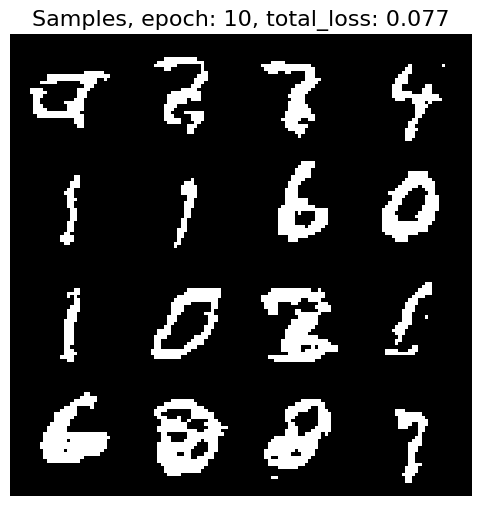

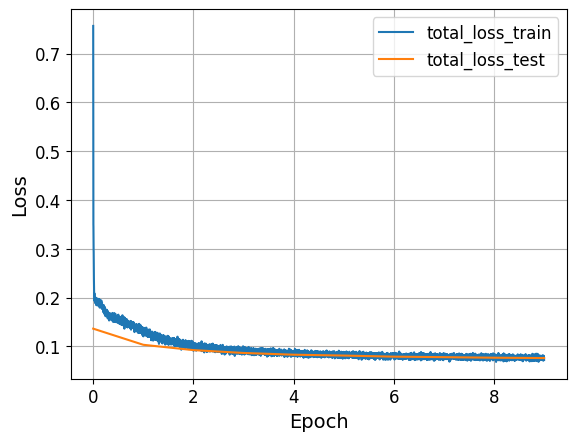

End of the training


In [19]:
# ====
# your code
# choose these parameters
EPOCHS = 10
BATCH_SIZE = 64
LR = 0.0005

EMB_DIM = 64
NUM_HEADS = 4
NUM_LAYERS = 4
# ====

image_gpt = ImageGPT((32, 32), EMB_DIM, NUM_HEADS, NUM_LAYERS)

train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(test_data, batch_size=BATCH_SIZE)

# choose any optimizer/scheduler as you want
optimizer = torch.optim.Adam(image_gpt.parameters(), lr=LR)

train_model(
    image_gpt,
    train_loader,
    test_loader,
    epochs=EPOCHS,
    optimizer=optimizer,
    device=DEVICE,
    n_samples=16, # Remember the infernce is slow, so, you can lower the value
    visualize_samples=True # or you can turn off smapling by setting `visualize_samples=False`
)

Let sample from our model. You probably get better samples than PixelCNN samples.

If I had more compute it would've been 100% better!

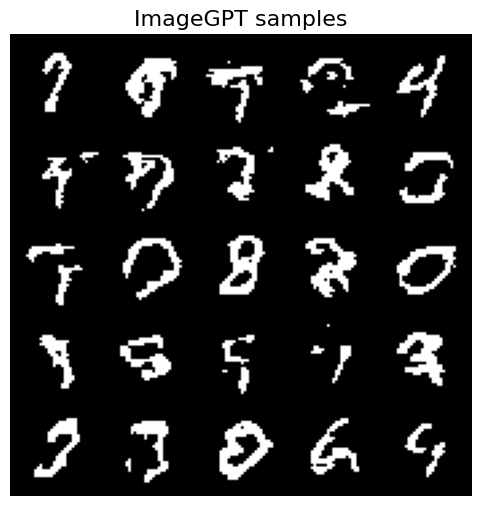

In [21]:
samples = image_gpt.sample(25)
show_samples(samples, title="ImageGPT samples", nrow=5)